In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv"


--2025-02-05 19:29:16--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.239.15.127, 18.239.15.40, 18.239.15.11, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.239.15.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.04s   

2025-02-05 19:29:17 (89.8 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



Netflix is a global media streaming, needs to understand patterns in the type, ratings, genres. This will help to decide on content production strategies, optimize content distribution across countries, and
increase engagement on the platform.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('netflix.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(data.shape)

(8807, 12)


In [ ]:
print(data.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
print(data.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [ ]:
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7976 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7976 non-null   object  
 1   type          7976 non-null   object  
 2   title         7976 non-null   object  
 3   director      5751 non-null   object  
 4   cast          7305 non-null   object  
 5   country       7976 non-null   category
 6   date_added    7967 non-null   object  
 7   release_year  7976 non-null   int64   
 8   rating        7973 non-null   category
 9   duration      7973 non-null   object  
 10  listed_in     7976 non-null   category
 11  description   7976 non-null   object  
dtypes: category(3), int64(1), object(8)
memory usage: 704.9+ KB
None


In [59]:
data_cast = data['cast'].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
data_cast.name = 'cast'
print(data.drop('cast', axis=1).join(data_cast))

     show_id     type                 title          director        country  \
0         s1    Movie  Dick Johnson Is Dead   Kirsten Johnson  United States   
1         s2  TV Show         Blood & Water  Unknown Director   South Africa   
1         s2  TV Show         Blood & Water  Unknown Director   South Africa   
1         s2  TV Show         Blood & Water  Unknown Director   South Africa   
1         s2  TV Show         Blood & Water  Unknown Director   South Africa   
...      ...      ...                   ...               ...            ...   
8806   s8807    Movie                Zubaan       Mozez Singh          India   
8806   s8807    Movie                Zubaan       Mozez Singh          India   
8806   s8807    Movie                Zubaan       Mozez Singh          India   
8806   s8807    Movie                Zubaan       Mozez Singh          India   
8806   s8807    Movie                Zubaan       Mozez Singh          India   

     date_added  release_year rating   

In [57]:
data['cast'] = data['cast'].fillna('Unknown Actor')
data['director'] = data['director'].fillna('Unknown Director')
data['duration'] = data['duration'].fillna(0)
data['release_year'] = data['release_year'].fillna(0)

In [58]:
missing_values = data.isnull().sum()
missing_values

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,94
release_year,0
rating,3
duration,0


In [60]:
print(data['type'].value_counts())
print(data['country'].value_counts().head())
print(data['listed_in'].unique())

type
Movie      5691
TV Show    2285
Name: count, dtype: int64
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64
['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries', 'International TV Shows, Romantic TV Shows, TV..., 'Dramas, Independent Movies, International Mov..., 'British TV Shows, Reality TV', ..., 'Action & Adventure, Comedies, Horror Movies', 'Classic & Cult TV, Crime TV Shows, TV Dramas', 'Action & Adventure, Documentaries, Sports Mov..., 'International Movies, LGBTQ Movies, Romantic ..., 'Cult Movies, Dramas, Thrillers']
Length: 498
Categories (514, object): ['Action & Adventure', 'Action & Adventure, Anime Features',
                           'Action & Adventure, Anime Features, Children ..., 'Action & Adventure, Anime Features, Classic M...,
                           ..., 'TV Horror, Teen TV Shows',
                           'TV Sci-Fi & Fantasy, TV Thrillers

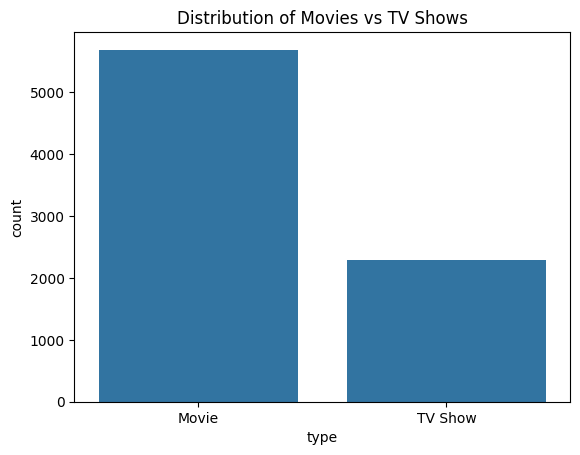

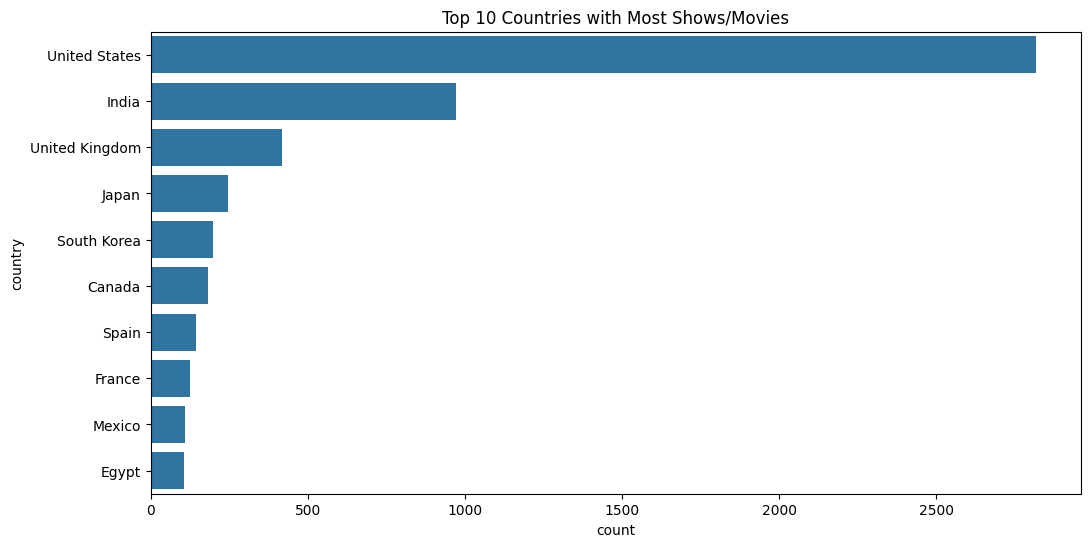

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='type', data=data)
plt.title('Distribution of Movies vs TV Shows')
plt.show()
plt.figure(figsize=(12,6))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index[:10])
plt.title('Top 10 Countries with Most Shows/Movies')
plt.show()


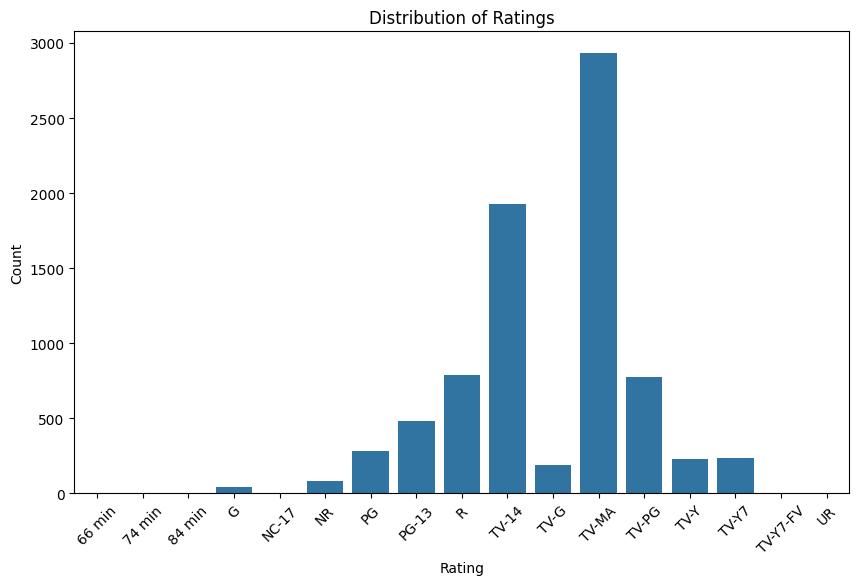

In [102]:
# Univariate analysis for 'rating'
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



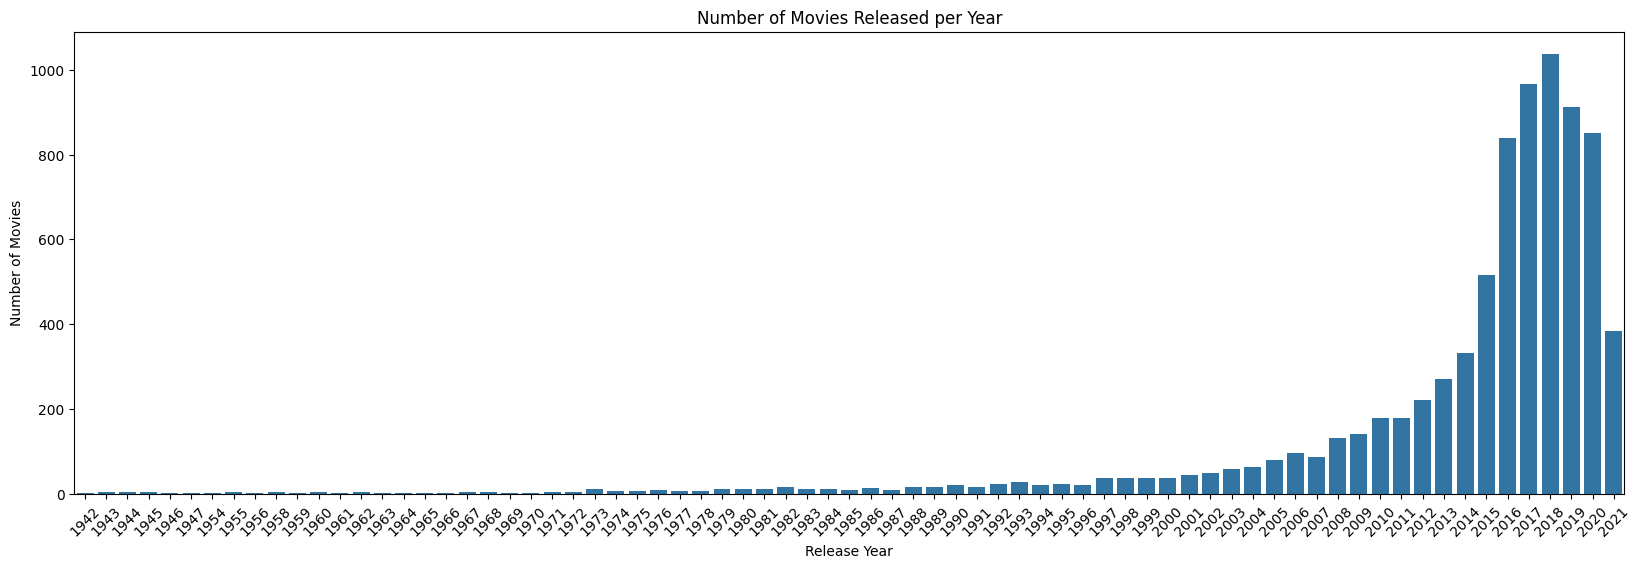

In [81]:
plt.figure(figsize=(20, 6))
sns.countplot(x='release_year', data=data)
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()


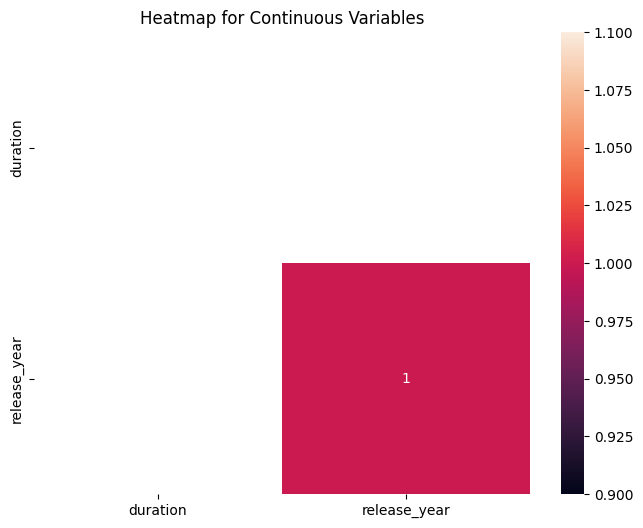

In [94]:
correlation_matrix = data[['duration', 'release_year']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap for Continuous Variables')
plt.show()


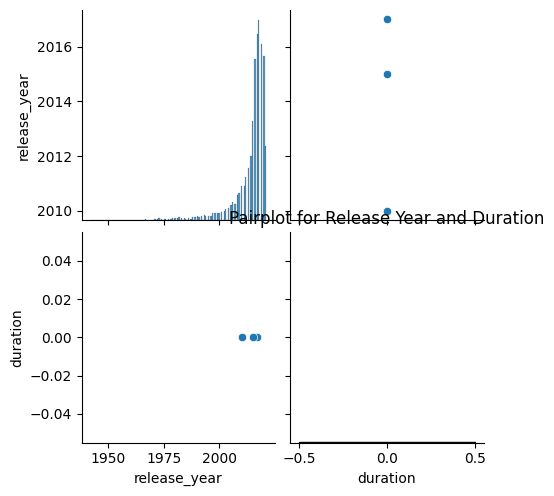

In [98]:
sns.pairplot(data[['release_year', 'duration']])
plt.title('Pairplot for Release Year and Duration')
plt.show()

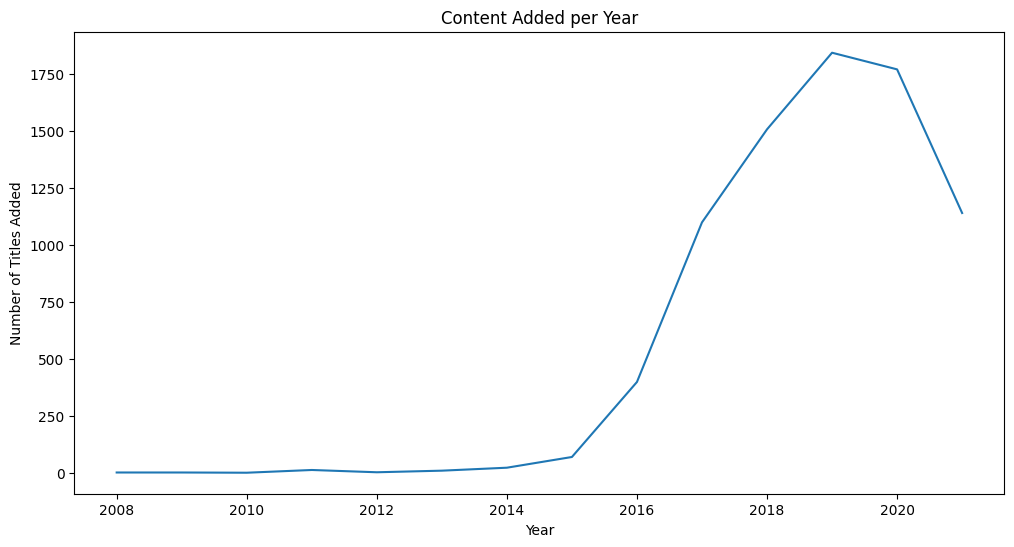

In [ ]:
data['date_added'] = pd.to_datetime(data['date_added'], format='%B %d, %Y', errors='coerce')
data['year_added'] = data['date_added'].dt.year
content_growth = data.groupby('year_added')['show_id'].count()
plt.figure(figsize=(12, 6))
content_growth.plot(kind='line')
plt.title('Content Added per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

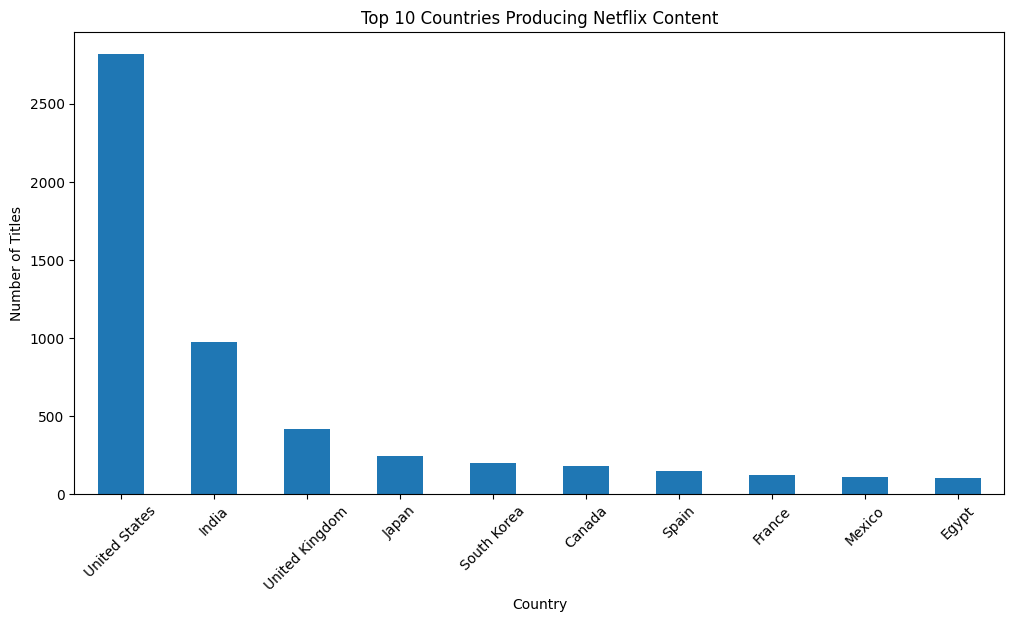

In [ ]:
top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

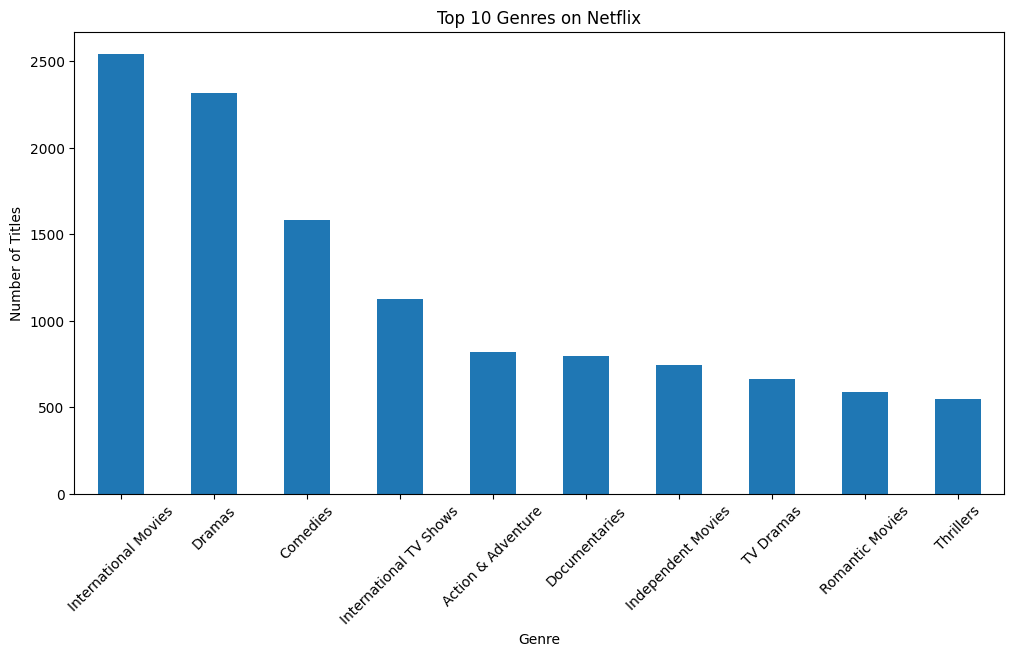

In [ ]:
genres = data['listed_in'].str.split(', ', expand=True).stack()
top_genres = genres.value_counts().head(10)
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

<ipython-input-66-80ea0d2cf88b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['month_added'] = tv_shows['date_added'].dt.month


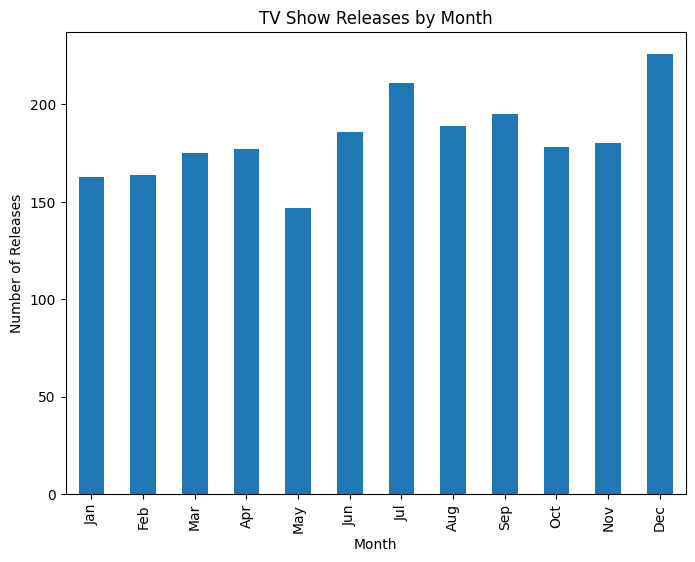

In [66]:
tv_shows = data[data['type'] == 'TV Show']
tv_shows['month_added'] = tv_shows['date_added'].dt.month
monthly_releases = tv_shows['month_added'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
monthly_releases.plot(kind='bar')
plt.title('TV Show Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [65]:
#Best Week to Release
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['week_added'] = data['date_added'].dt.isocalendar().week
weekly_counts = data.groupby('week_added')['title'].nunique().sort_values(ascending=False)
print(weekly_counts)


week_added
1     348
44    289
40    263
31    247
35    239
26    238
9     237
13    231
27    217
18    211
5     191
22    185
48    181
50    172
14    160
37    158
39    154
11    150
16    141
7     140
23    139
30    137
15    135
24    132
46    131
49    131
33    129
51    127
17    125
10    124
52    123
25    119
20    117
42    116
36    115
47    114
34    112
43    111
3     108
41    108
32    108
38    106
29    104
28    104
8     104
2     101
12    100
21     96
53     96
6      94
45     94
19     90
4      80
Name: title, dtype: int64


In [67]:
#Best month to Release
data['month_added'] = data['date_added'].dt.month
monthly_counts = data.groupby('month_added')['title'].nunique().sort_values(ascending=False)
print(monthly_counts)

month_added
12.0    744
7.0     701
10.0    696
1.0     690
4.0     689
3.0     678
11.0    663
8.0     661
9.0     656
6.0     629
5.0     539
2.0     536
Name: title, dtype: int64


In [68]:
# top directors
directors_count = data.groupby('director')['title'].nunique().sort_values(ascending=False).head(10)
print(directors_count)

director
Unknown Director          2225
Raúl Campos, Jan Suter      18
Marcus Raboy                15
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Youssef Chahine             12
Steven Spielberg            11
Don Michael Paul            10
Name: title, dtype: int64


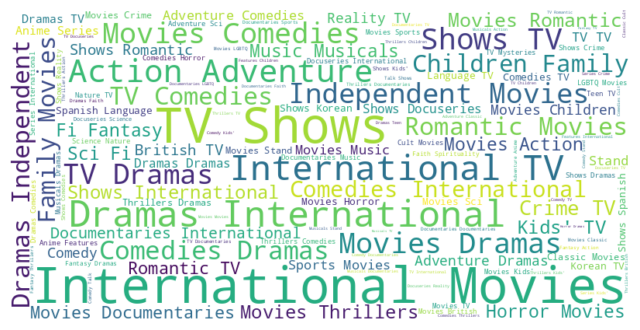

In [71]:
from wordcloud import WordCloud
all_genres = ' '.join(data['listed_in'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [76]:
#diff of release and adding to netflix
data['date_added'] = pd.to_datetime(data['date_added'])
data['ddded_year'] = data['date_added'].dt.year
data['time_difference'] = data['ddded_year'] - data['release_year']
print(data[['title', 'release_year', 'date_added', 'time_difference']])


                              title  release_year date_added  time_difference
0              Dick Johnson Is Dead          2020 2021-09-25              1.0
1                     Blood & Water          2021 2021-09-24              0.0
4                      Kota Factory          2021 2021-09-24              0.0
7                           Sankofa          1993 2021-09-24             28.0
8     The Great British Baking Show          2021 2021-09-24              0.0
...                             ...           ...        ...              ...
8801                        Zinzana          2015 2016-03-09              1.0
8802                         Zodiac          2007 2019-11-20             12.0
8804                     Zombieland          2009 2019-11-01             10.0
8805                           Zoom          2006 2020-01-11             14.0
8806                         Zubaan          2015 2019-03-02              4.0

[7976 rows x 4 columns]


<ipython-input-43-455a6b766c2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '', regex=False)
<ipython-input-43-455a6b766c2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')


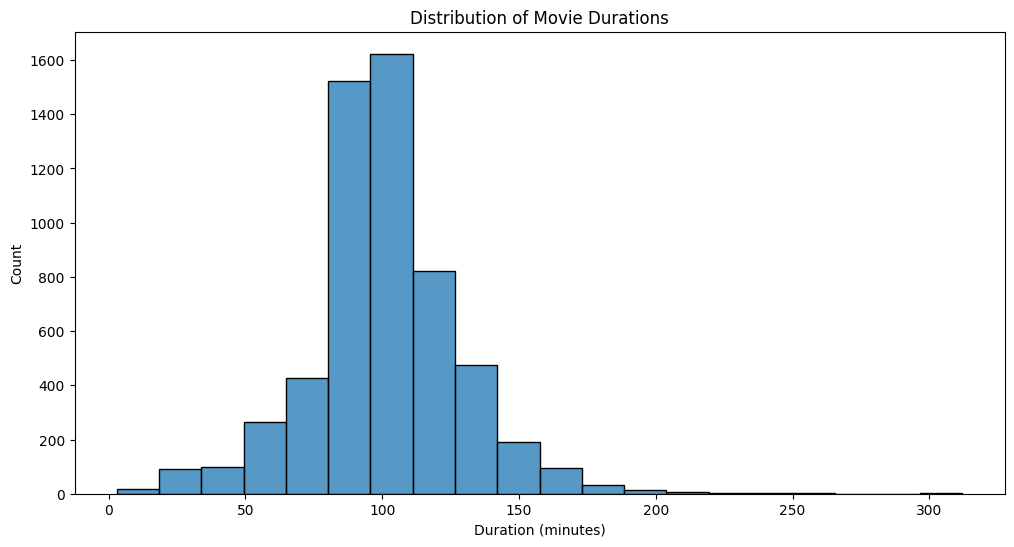

In [ ]:
movies = data[data['type'] == 'Movie']
movies['duration'] = movies['duration'].str.replace(' min', '', regex=False)
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')
movies = movies.dropna(subset=['duration'])
movies['duration'] = movies['duration'].astype(int)

plt.figure(figsize=(12, 6))
sns.histplot(data=movies, x='duration', bins=20)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


In [106]:
# Checking for missing values
data['cast'] = data['cast'].fillna('Unknown Actor')
data['director'] = data['director'].fillna('Unknown Director')
data['duration'] = data['duration'].fillna(0)
data['release_year'] = data['release_year'].fillna(data['release_year'].mode()[0])
missing_values_after = data.isnull().sum()
print(missing_values_after)


show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added         94
release_year        0
rating              3
duration            0
listed_in           0
description         0
year_added         94
week_added         94
month_added        94
days_to_add        94
ddded_year         94
Time_difference    94
time_difference    94
dtype: int64


**`Insights Based on Non-Graphical and Visual Analysis`**

**6.1**
*   Genre and Country Representation:
Dramas and Comedies are overrepresented in the catalog.
The US, India, and the UK are the top content-producing countries on the platform.
"International Movies" is a fast-growing category, indicating Netflix's focus on global content.
*   The number of titles added to Netflix has increased dramatically in the last 5-7 years.

**6.2**


*   The distribution of ratings is typically biased towards content rated as TV-MA in many countries

**6.3**
*   Distribution of Rating Insight: Shows that Netflix produces more content rated TV-MA, with smaller shares for other ratings such as G, reflecting the global diversity of its content audience.
*   Movies vs. TV shows has shifted over time, A rising number of TV shows in recent years may indicate a growing preference for episodic content in the streaming market.



**Business Insights**

Growing interest in international content across various countries.
Documentaries and docuseries are gaining popularity globally.
There's an underrepresentation of horror and children & family content relative to potential demand.

**Recommendations**

*   Increase investment in TV show production, particularly for international markets, to capitalize on the growing trend.
*   Investing in more documentaries and docuseries, which are popular and relatively cost-effective to produce.
*   Time new releases strategically, focusing on peak months (January, October, December) and Fridays for maximum impact.
*   Expand the "International Movies" category to get diverse global audiences.